# motion estimation in spikeinterface


Motion estimation/correction on dataset nicelly provided by Maxime Juventin.


In [3]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
%matplotlib inline
# %matplotlib widget

In [5]:
from pathlib import Path

import spikeinterface.full as si

import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 12)

import probeinterface as pi
from probeinterface.plotting import plot_probe
import json


In [55]:
# local folder
data_folder = Path('/crnldata/cmo/multisite/DATA_MANIP/multisite/NBuonviso202006_spike_respi_maxime/')

# pyacq_folder = data_folder / 'data/SD940/2020-11-29T14h27m37_animal=SD940_session=2_trial=S1'
# probe_name_A = 'A1x32-Poly3-10mm-50-177'
# probe_name_B = 'A1x32-Poly3-10mm-50-177'

pyacq_folder = data_folder / 'data/SD2094/2021-08-19T11h48m24_animal=SD2094_session=5_trial=S1'
probe_name_A = 'A1x32-Poly3-10mm-50-177'
probe_name_B = 'A1x32-Poly3-10mm-50-177'


base_working = Path('/mnt/data/NBuonviso202006_spike_respi_maxime/test_drift/')
preprocess_folder = base_working / 'preprocess'
peak_folder = base_working / 'peaks'


peak_folder.mkdir(exist_ok=True, parents=True)

## read recording

The format is a pyacq folder.

In [14]:
def read_pyacq_folder(pyacq_folder):
    with open(pyacq_folder / 'stream_properties.json', 'r', encoding='utf8') as f:
        stream_properties = json.load(f)
    input0 = stream_properties['input0']
    sr = input0['sample_rate']
    dtype = input0['dtype']
    shape = list(input0['shape'])
    shape[0] = -1
    num_channels = shape[1]
    rec = si.read_binary(file_paths=[pyacq_folder / 'input0.raw'],
                         sampling_frequency=sr,
                         num_channels=num_channels,
                         dtype=dtype)
    return rec

In [16]:
full_rec = read_pyacq_folder(pyacq_folder)
full_rec

BinaryRecordingExtractor: 72 channels - 30.0kHz - 1 segments - 126,228,224 samples 
                          4,207.61s (1.17 hours) - float32 dtype - 33.86 GiB
  file_paths: ['/crnldata/cmo/multisite/DATA_MANIP/multisite/NBuonviso202006_spike_respi_maxime/data/SD2094/2021-08-19T11h48m24_animal=SD2094_session=5_trial=S1/input0.raw']

In [17]:
probe_A = pi.get_probe('neuronexus', probe_name_A)
probe_B = pi.get_probe('neuronexus', probe_name_B)
probe_A.wiring_to_device('H32>RHD2132')
probe_B.wiring_to_device('H32>RHD2132', channel_offset=32)

display(probe_A.to_dataframe(complete=True))
display(probe_B.to_dataframe(complete=True))




,x,y,contact_shapes,radius,shank_ids,contact_ids,device_channel_indices,si_units,plane_axis_x_0,plane_axis_x_1,plane_axis_y_0,plane_axis_y_1
0,0.0,450.0,circle,10.0,,,16,um,1.0,0.0,0.0,1.0
1,0.0,500.0,circle,10.0,,,17,um,1.0,0.0,0.0,1.0
2,0.0,400.0,circle,10.0,,,18,um,1.0,0.0,0.0,1.0
3,0.0,350.0,circle,10.0,,,20,um,1.0,0.0,0.0,1.0
4,0.0,300.0,circle,10.0,,,21,um,1.0,0.0,0.0,1.0
5,0.0,250.0,circle,10.0,,,22,um,1.0,0.0,0.0,1.0
6,0.0,200.0,circle,10.0,,,31,um,1.0,0.0,0.0,1.0
7,0.0,150.0,circle,10.0,,,30,um,1.0,0.0,0.0,1.0
8,0.0,100.0,circle,10.0,,,29,um,1.0,0.0,0.0,1.0
9,0.0,50.0,circle,10.0,,,27,um,1.0,0.0,0.0,1.0


,x,y,contact_shapes,radius,shank_ids,contact_ids,device_channel_indices,si_units,plane_axis_x_0,plane_axis_x_1,plane_axis_y_0,plane_axis_y_1
0,0.0,450.0,circle,10.0,,,48,um,1.0,0.0,0.0,1.0
1,0.0,500.0,circle,10.0,,,49,um,1.0,0.0,0.0,1.0
2,0.0,400.0,circle,10.0,,,50,um,1.0,0.0,0.0,1.0
3,0.0,350.0,circle,10.0,,,52,um,1.0,0.0,0.0,1.0
4,0.0,300.0,circle,10.0,,,53,um,1.0,0.0,0.0,1.0
5,0.0,250.0,circle,10.0,,,54,um,1.0,0.0,0.0,1.0
6,0.0,200.0,circle,10.0,,,63,um,1.0,0.0,0.0,1.0
7,0.0,150.0,circle,10.0,,,62,um,1.0,0.0,0.0,1.0
8,0.0,100.0,circle,10.0,,,61,um,1.0,0.0,0.0,1.0
9,0.0,50.0,circle,10.0,,,59,um,1.0,0.0,0.0,1.0


(<matplotlib.collections.PolyCollection at 0x7f255e5eb730>,
 <matplotlib.collections.PolyCollection at 0x7f255e777970>)

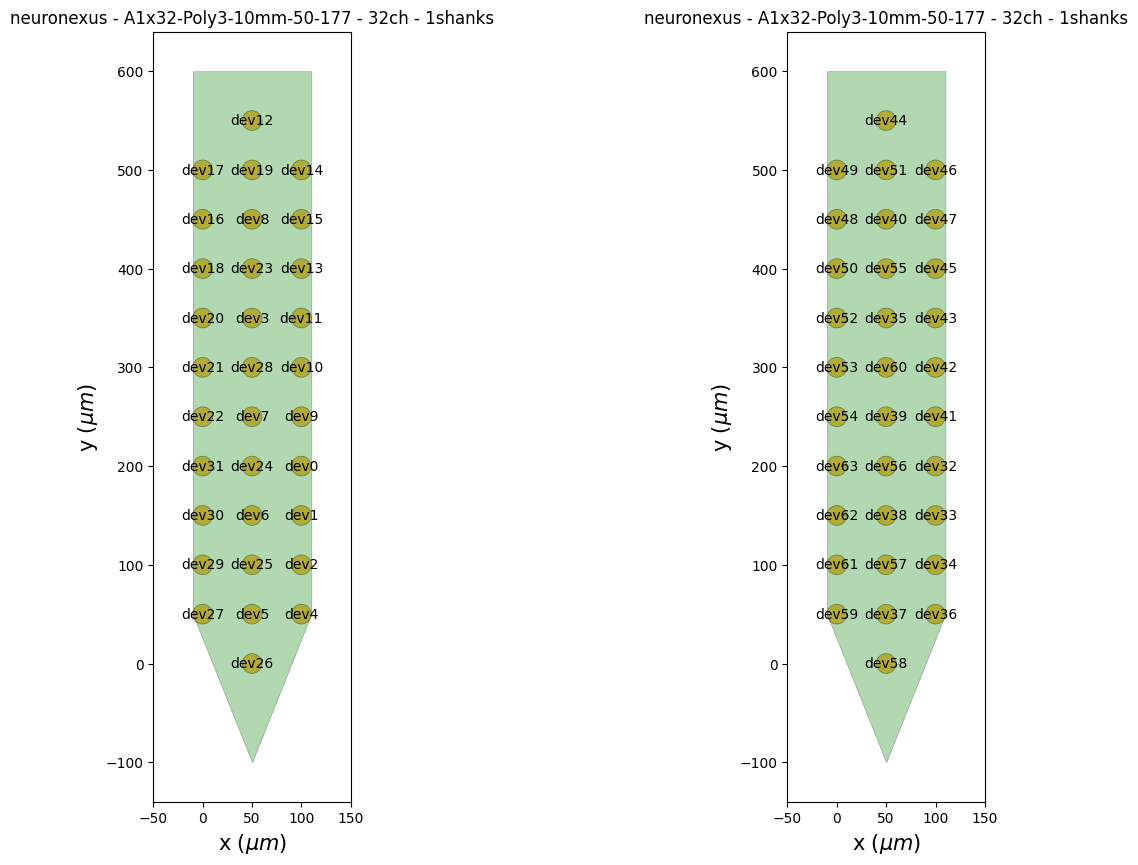

In [18]:
fig, axs = plt.subplots(figsize=(15, 10), ncols=2)
plot_probe(probe_A, with_device_index=True, ax=axs[0])
plot_probe(probe_B, with_device_index=True, ax=axs[1])

In [19]:
recA = full_rec.set_probe(probe_A)
recB = full_rec.set_probe(probe_B)


In [20]:
recA

ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 126,228,224 samples 
                       4,207.61s (1.17 hours) - float32 dtype - 15.05 GiB

In [21]:
recB

ChannelSliceRecording: 32 channels - 30.0kHz - 1 segments - 126,228,224 samples 
                       4,207.61s (1.17 hours) - float32 dtype - 15.05 GiB

In [22]:
# global kwargs for parallel computing
job_kwargs = dict(
    n_jobs=20,
    chunk_duration='1s',
    progress_bar=True,
)

## preprocess

This take 4 min for 30min of signals

In [23]:
rec = recB

In [52]:
if not preprocess_folder.exists():
    rec_filtered = si.bandpass_filter(rec, freq_min=300., freq_max=6000.)
    rec_preprocessed = si.common_reference(rec_filtered, reference='global', operator='median')
    rec_preprocessed.save(folder=preprocess_folder, **job_kwargs)
rec_preprocessed = si.load_extractor(preprocess_folder)

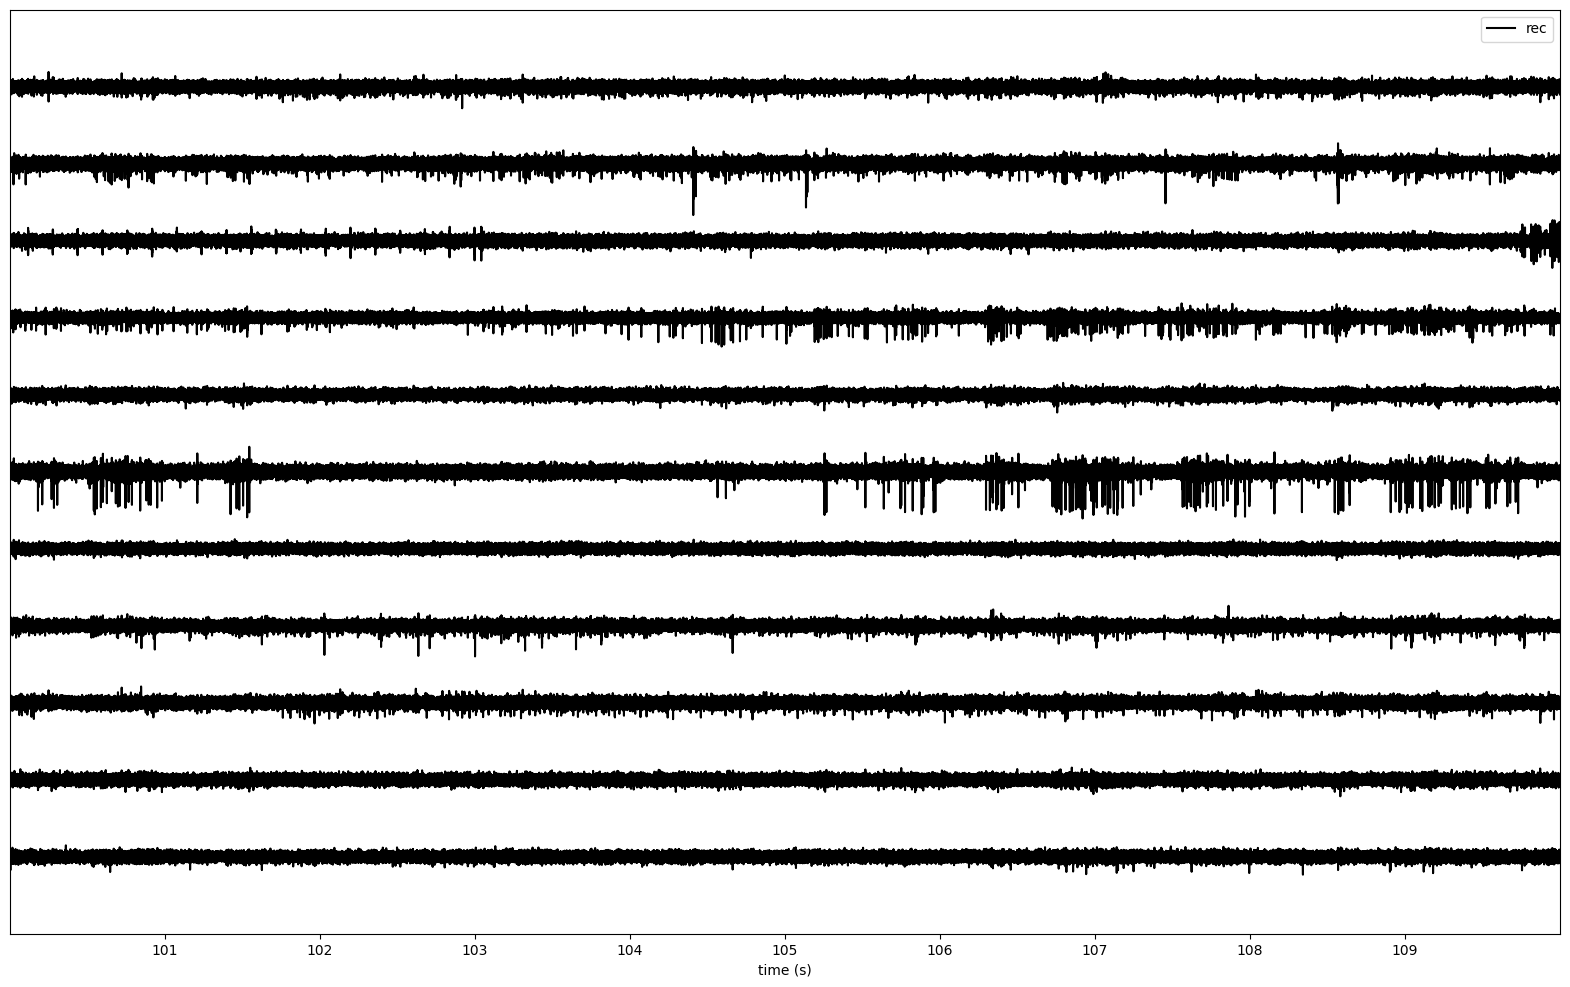

In [53]:
# plot and check spikes
si.plot_traces(rec_preprocessed, time_range=(100, 110), channel_ids=rec.channel_ids[::3])

## estimate noise

Text(0.5, 1.0, 'noise across channel')

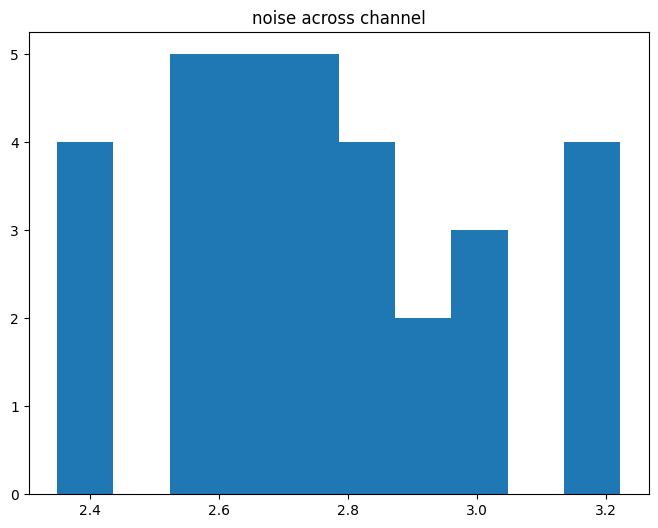

In [56]:
if not (peak_folder / 'noise_levels.npy').exists():
    noise_levels = si.get_noise_levels(rec_preprocessed, return_scaled=False)
    np.save(peak_folder / 'noise_levels.npy', noise_levels)
noise_levels = np.load(peak_folder / 'noise_levels.npy')

fig, ax = plt.subplots(figsize=(8,6))
ax.hist(noise_levels, bins=10)
ax.set_title('noise across channel')

## detect peaks

This take 1min30s

In [57]:
from spikeinterface.sortingcomponents.peak_detection import detect_peaks


In [60]:
if not (peak_folder / 'peaks.npy').exists():
    peaks = detect_peaks(
        rec_preprocessed,
        method='locally_exclusive',
        radius_um=150,
        peak_sign='neg',
        detect_threshold=5,
        exclude_sweep_ms=0.8,
        noise_levels=noise_levels,
        **job_kwargs,
    )
    np.save(peak_folder / 'peaks.npy', peaks)
peaks = np.load(peak_folder / 'peaks.npy')
print(peaks.shape)

detect peaks using locally_exclusive:   0%|          | 0/4208 [00:00<?, ?it/s]

(853510,)


## localize peaks

Here we chosse **'monopolar_triangulation' with log barrier**

In [61]:
from spikeinterface.sortingcomponents.peak_localization import localize_peaks

In [63]:
if not (peak_folder / 'peak_locations_monopolar_triangulation_log_limit.npy').exists():
    peak_locations = localize_peaks(
        rec_preprocessed,
        peaks,
        ms_before=0.3,
        ms_after=0.6,
        method='monopolar_triangulation',
        radius_um=150.,
        max_distance_um=1000.,
        optimizer='minimize_with_log_penality',
        **job_kwargs,
    )
    np.save(peak_folder / 'peak_locations_monopolar_triangulation_log_limit.npy', peak_locations)
    print(peak_locations.shape)
peak_locations = np.load(peak_folder / 'peak_locations_monopolar_triangulation_log_limit.npy')

localize peaks using monopolar_triangulation:   0%|          | 0/4208 [00:00<?, ?it/s]

(853510,)


In [64]:

print(peak_locations)

[( 43.51354237, 144.35871616, 34.88352242,  983.32853225)
 (-20.4694276 ,  98.39849803, 89.83311813, 1545.92041846)
 ( 81.81251183,  11.46646112, 33.45479524, 1617.15078511) ...
 (-25.08877749, 303.33159278, 22.5480019 , 1085.18329925)
 ( -9.26740803, 302.03128019, 25.64490265,  792.38127372)
 ( -3.64075213,  91.71803865, 44.04872413, 1148.0646132 )]


## plot on probe

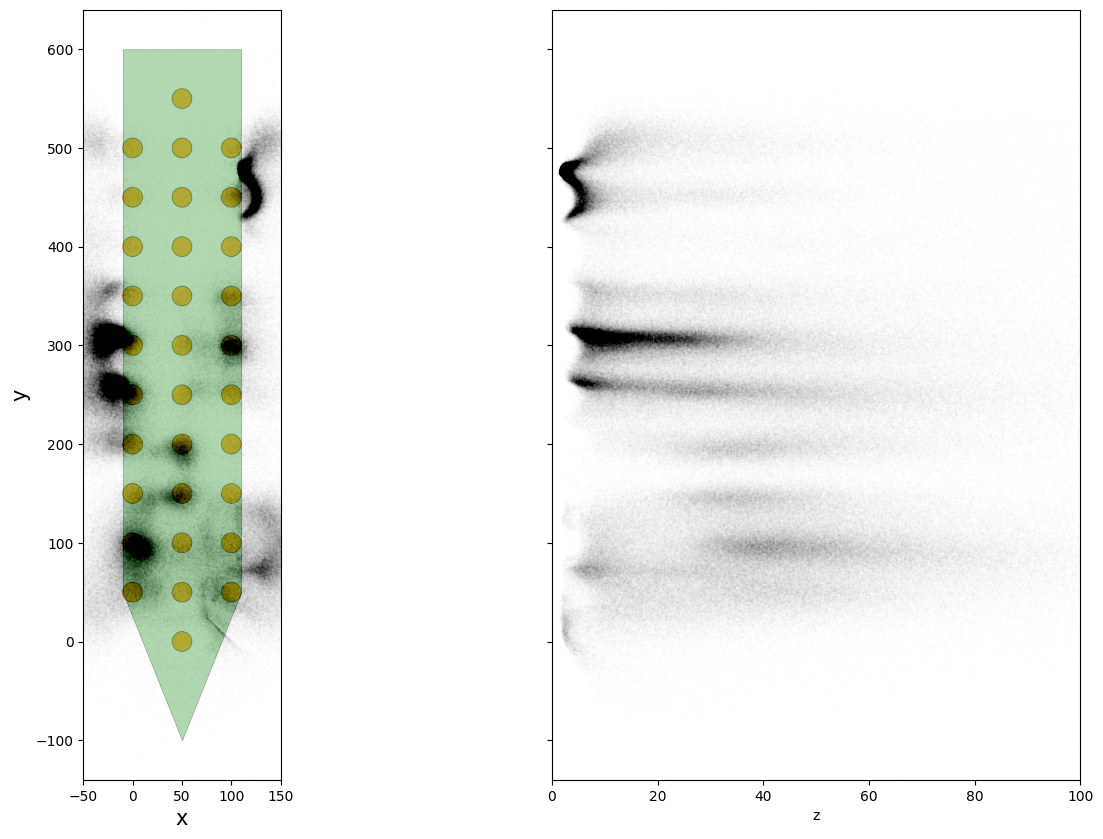

In [65]:
fig, axs = plt.subplots(ncols=2, sharey=True, figsize=(15, 10))
ax = axs[0]
si.plot_probe_map(rec_preprocessed, ax=ax)
ax.scatter(peak_locations['x'], peak_locations['y'], color='k', s=1, alpha=0.002)
ax.set_xlabel('x')
ax.set_ylabel('y')
if 'z' in peak_locations.dtype.fields:
    ax = axs[1]
    ax.scatter(peak_locations['z'], peak_locations['y'], color='k', s=1, alpha=0.002)
    ax.set_xlabel('z')
    ax.set_xlim(0, 100)

# ax.set_ylim(1800, 2500)

## plot peak depth vs time

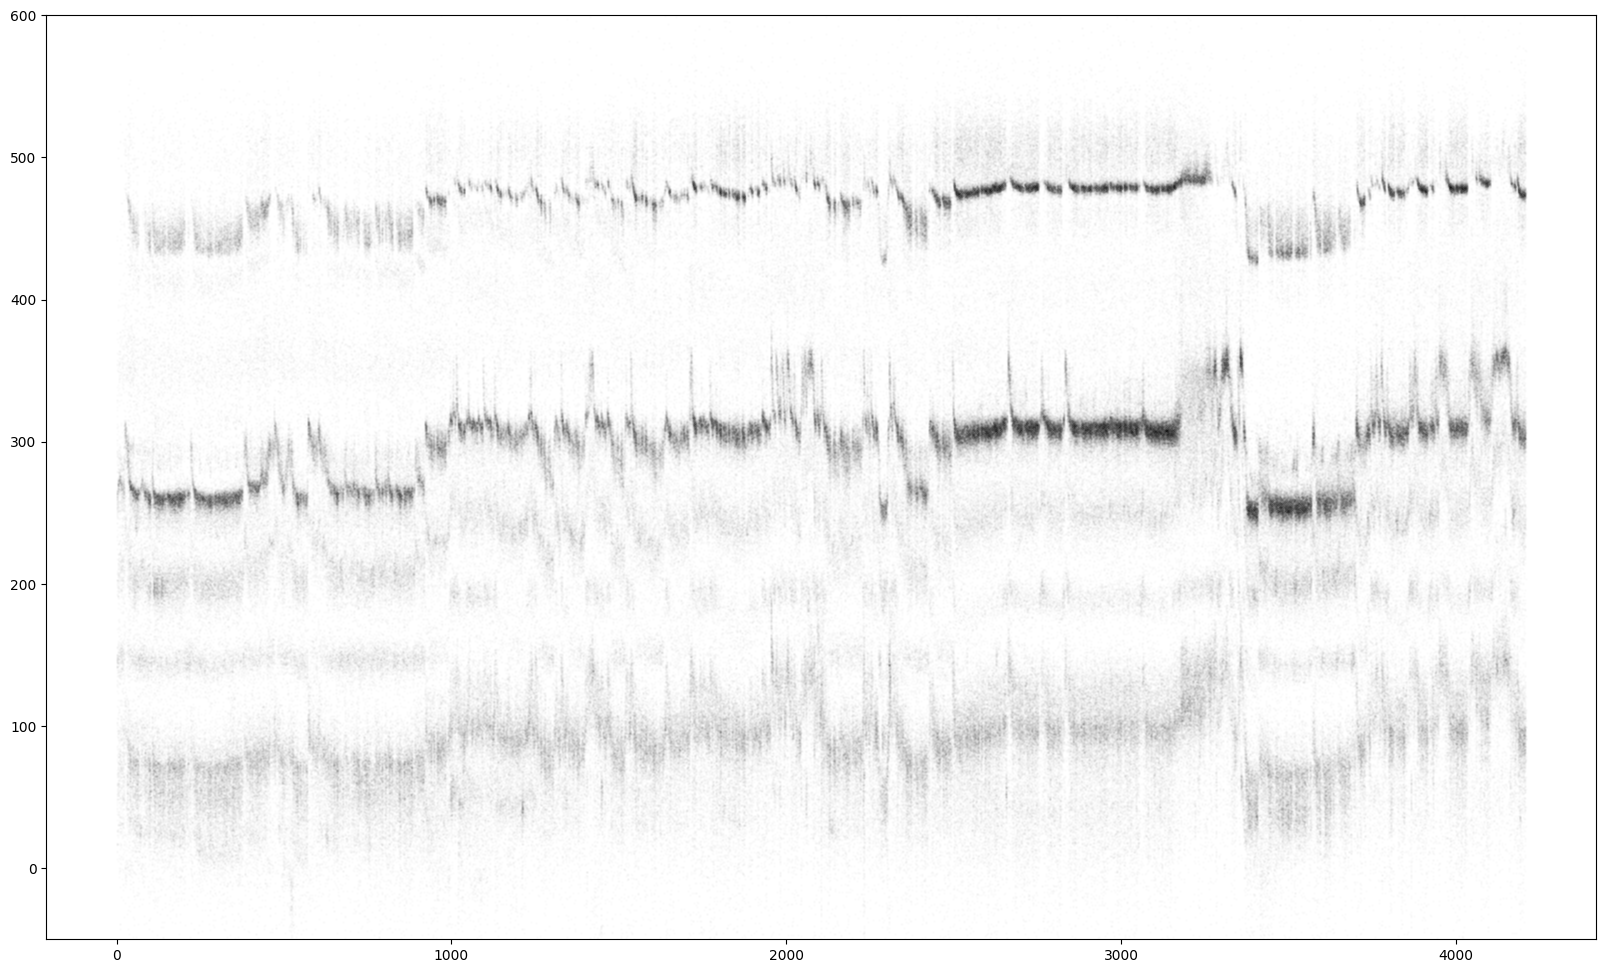

In [66]:
fig, ax = plt.subplots()
x = peaks['sample_index'] / rec_preprocessed.get_sampling_frequency()
y = peak_locations['y']
ax.scatter(x, y, s=1, color='k', alpha=0.009)
ax.set_ylim(-50, 600)
fig.savefig('Figure1_panelC1.png')

## motion estimation

Internally `estimate_motion()` does:
  * make_motion_histogram()
  * compute_pairwise_displacement()
  * compute_global_displacement()
  

In [67]:
from spikeinterface.sortingcomponents.motion_estimation import estimate_motion
# from spikeinterface.widgets import plot_displacement

In [68]:
motion_kwargs = dict(
    direction='y',
    bin_duration_s=5.,
    bin_um=10.,
    rigid=True,
    upsample_to_histogram_bin=False,
    output_extra_check=True,

    method='decentralized',
    pairwise_displacement_method='conv',
    convergence_method='lsqr_robust',
    conv_engine='torch',
    # conv_engine='numpy',
    corr_threshold=0.7,

    progress_bar=True,
    verbose=False,
)




In [83]:
if not (base_working / 'motion_rigid.npz').exists():

    motion, temporal_bins, spatial_bins, extra_check = estimate_motion(rec_preprocessed, peaks, peak_locations=peak_locations,
                                                                       **motion_kwargs)
    np.savez(base_working / 'motion_rigid.npz', 
            motion=motion, temporal_bins=temporal_bins, spatial_bins=spatial_bins,
            **extra_check)
npz = np.load(base_working / 'motion_rigid.npz')
motion = npz['motion']
temporal_bins = npz['temporal_bins']
spatial_bins = npz['spatial_bins']
extra_check = {k: npz[k] for k in ('non_rigid_windows', 'motion_histogram', 'pairwise_displacement_list', 'temporal_hist_bin_edges', 'spatial_hist_bin_edges') }


windows:   0%|          | 0/1 [00:00<?, ?it/s]

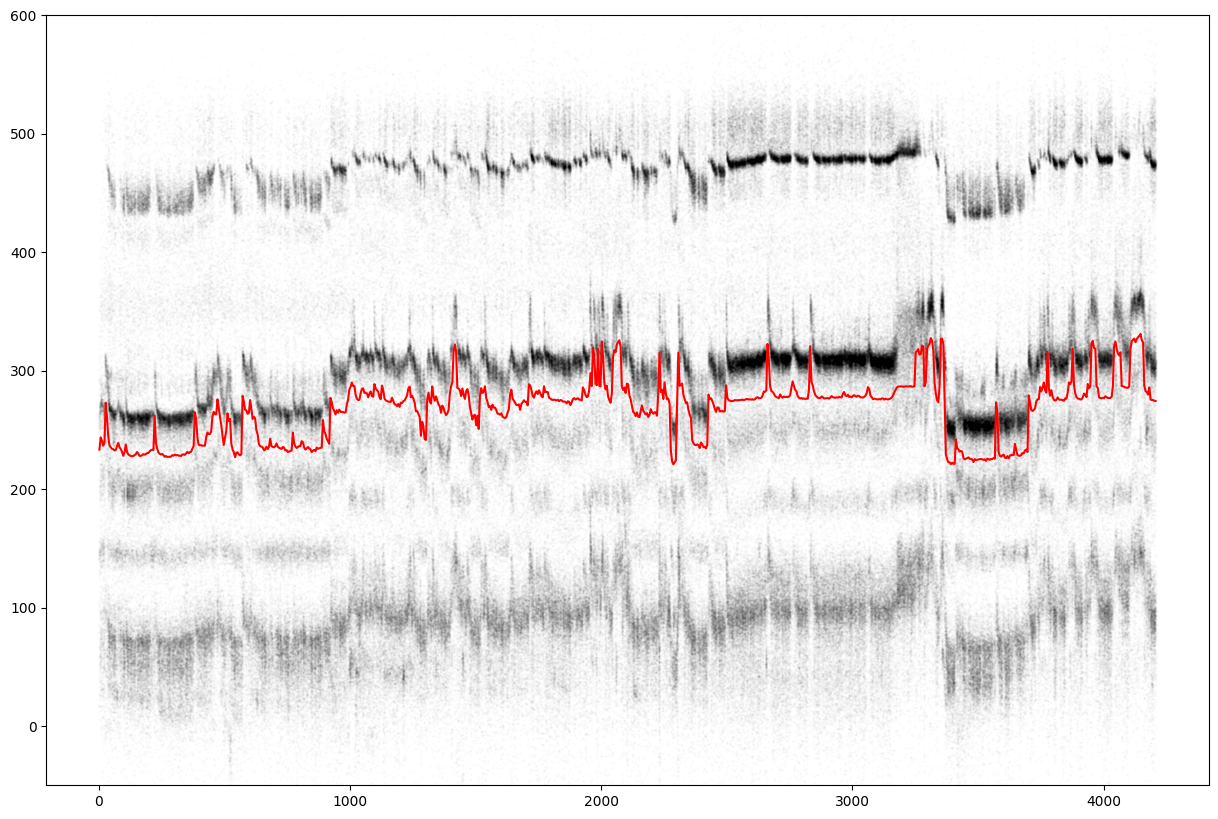

In [85]:
fig, ax = plt.subplots(figsize=(15, 10))
x = peaks['sample_index'] / rec_preprocessed.get_sampling_frequency()
y = peak_locations['y']
ax.scatter(x, y, s=1, color='k', alpha=0.01)
# plot_displacement(motion, temporal_bins, spatial_bins, extra_check, with_histogram=False, ax=ax)
ax.plot(temporal_bins, motion[:, 0] + spatial_bins[0], color='red')
ax.set_ylim(-50, 600)
fig.savefig('Figure1_PanelC2.png')

## flat peak depth

In [87]:
from spikeinterface.sortingcomponents.motion_interpolation import correct_motion_on_peaks

In [90]:
times = rec_preprocessed.get_times()
peak_locations_corrected = correct_motion_on_peaks(peaks, peak_locations, rec_preprocessed.get_sampling_frequency(),
                            motion, temporal_bins, spatial_bins)

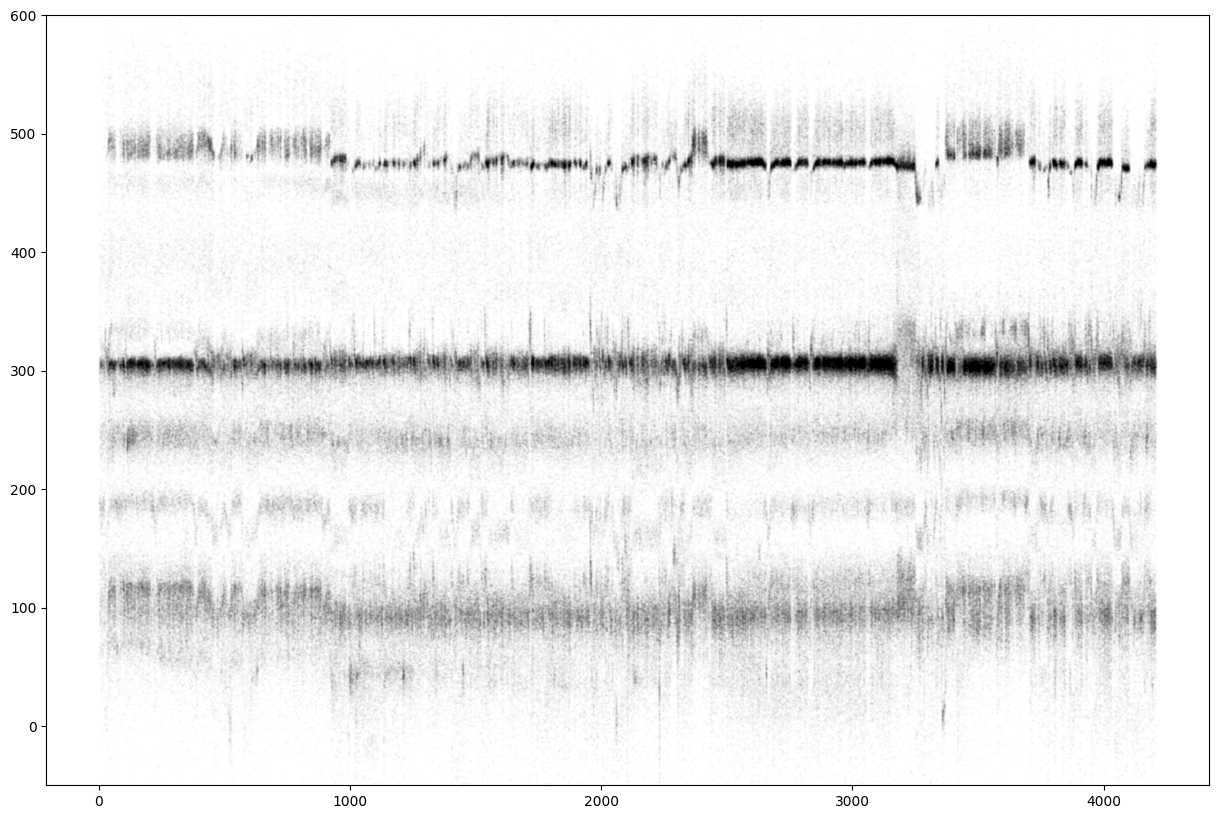

In [92]:
fig, ax = plt.subplots(figsize=(15, 10))
x = peaks['sample_index'] / rec_preprocessed.get_sampling_frequency()
y = peak_locations_corrected['y']
ax.scatter(x, y, s=1, color='k', alpha=0.01)
ax.set_ylim(-50, 600)
fig.savefig('Figure1_PanelC3.png')